<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Setting-up-the-Model-Architecture" data-toc-modified-id="Setting-up-the-Model-Architecture-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setting up the Model Architecture</a></span></li><li><span><a href="#Accessing-Individual-Layers" data-toc-modified-id="Accessing-Individual-Layers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Accessing Individual Layers</a></span></li><li><span><a href="#Visualizing-the-Building-Blocks-of-CNNs-–-Filters" data-toc-modified-id="Visualizing-the-Building-Blocks-of-CNNs-–-Filters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualizing the Building Blocks of CNNs – Filters</a></span></li><li><span><a href="#Visualizing-Feature-Maps" data-toc-modified-id="Visualizing-Feature-Maps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualizing Feature Maps</a></span></li></ul></div>

## Libraries 

In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from collections import deque
import tensorflow as tf
import pandas as pd
import numpy as np
import imutils
import pickle
import cv2
import os

In [2]:
print("[INFO] loading model and label binarizer...")
model = load_model('BrainTumor') 
print("[INFO] loading complete")

[INFO] loading model and label binarizer...
[INFO] loading complete


## Setting up the Model Architecture

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

##  Accessing Individual Layers

In [6]:
#creating a mapping of layer name ot layer details 
#we will create a dictionary layers_info which maps a layer name to its charcteristics
layers_info = {}
for i in model.layers:
    layers_info[i.name] = i.get_config()

#here the layer_weights dictionary will map every layer_name to its corresponding weights
layer_weights = {}
for i in model.layers:
    layer_weights[i.name] = i.get_weights()

print(layers_info['block5_conv1'])

{'name': 'block5_conv1', 'trainable': False, 'dtype': 'float32', 'filters': 512, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


## Visualizing the Building Blocks of CNNs – Filters

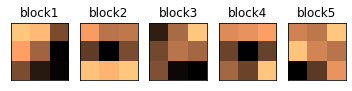

In [47]:
#Let’s plot the first filter of the first convolutional layer of every VGG16 block:
layers = model.layers
layer_ids = [1,4,7,11,15]
#plot the filters
fig,ax = plt.subplots(nrows=1,ncols=5)
for i in range(5):
    ax[i].imshow(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='copper')
    ax[i].set_title('block'+str(i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
#We can see the filters of different layers in the above output. 
#All the filters are of the same shape since VGG16 uses only 3×3 filters

In [4]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Visualizing Feature Maps 

(1, 244, 244, 64)
(1, 244, 244, 64)
(1, 122, 122, 64)
(1, 122, 122, 128)
(1, 122, 122, 128)
(1, 61, 61, 128)
(1, 61, 61, 256)
(1, 61, 61, 256)
(1, 61, 61, 256)
(1, 30, 30, 256)
(1, 30, 30, 512)
(1, 30, 30, 512)
(1, 30, 30, 512)
(1, 15, 15, 512)
(1, 15, 15, 512)
(1, 15, 15, 512)
(1, 15, 15, 512)
(1, 7, 7, 512)
(1, 1, 1, 512)
(1, 512)
(1, 64)
(1, 64)
(1, 2)


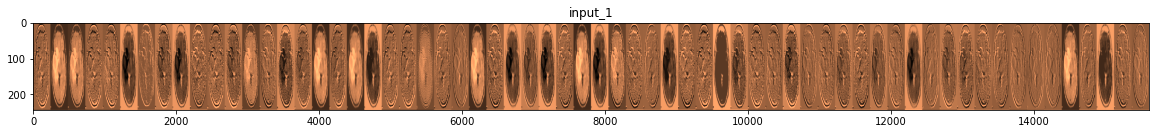

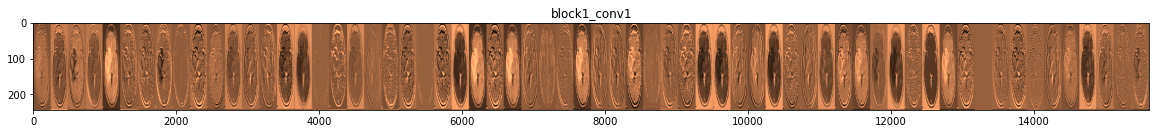

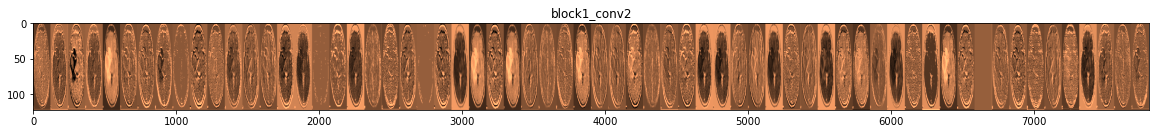

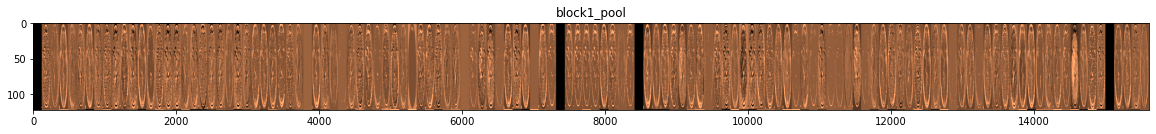

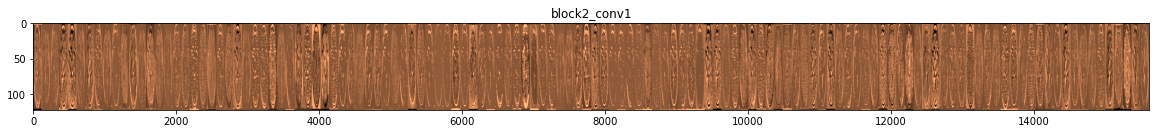

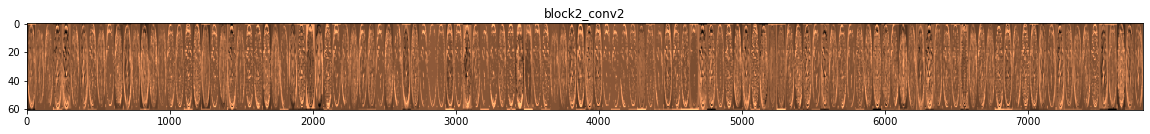

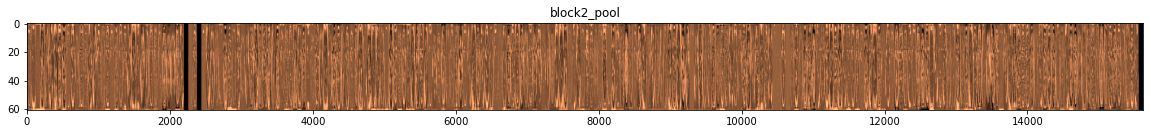

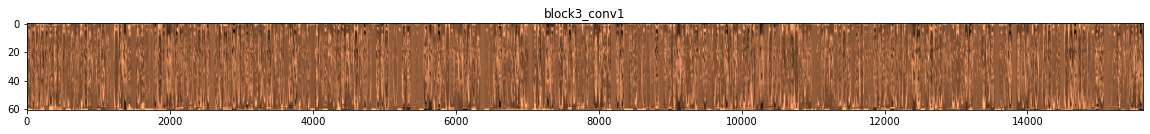

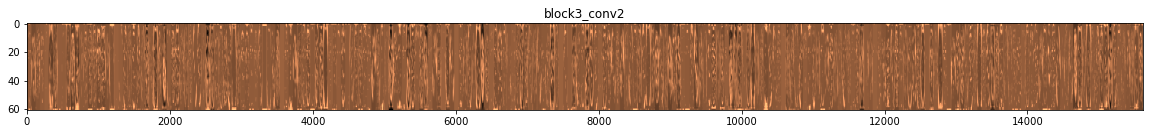

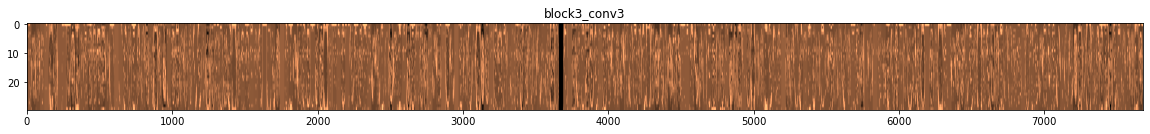

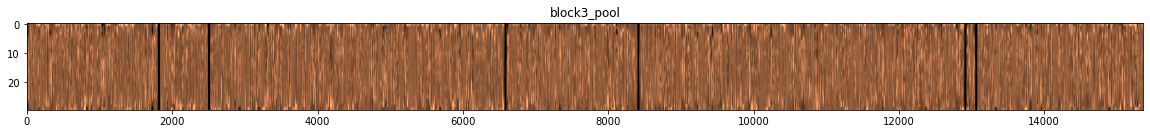

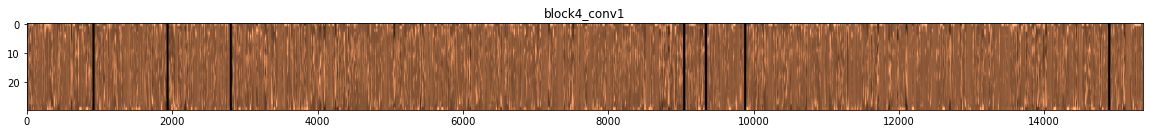

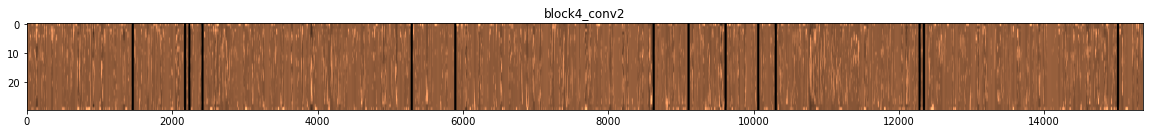

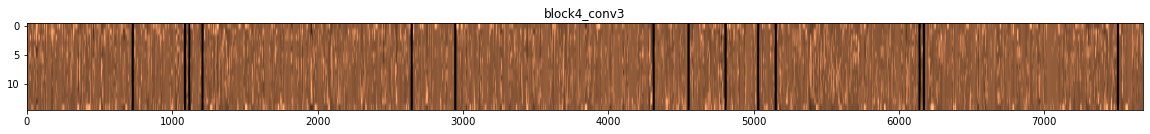

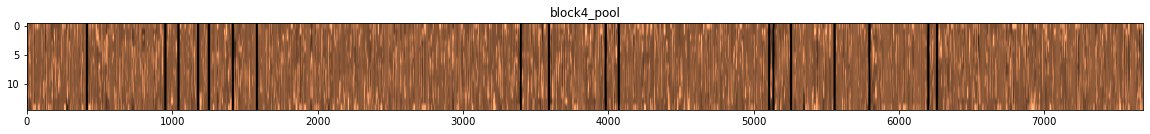

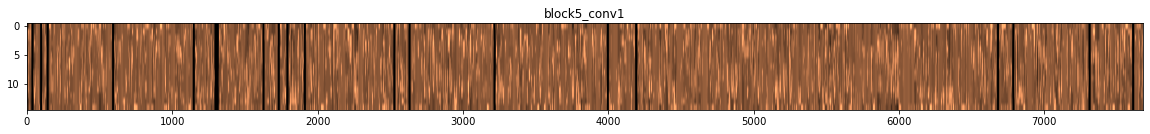

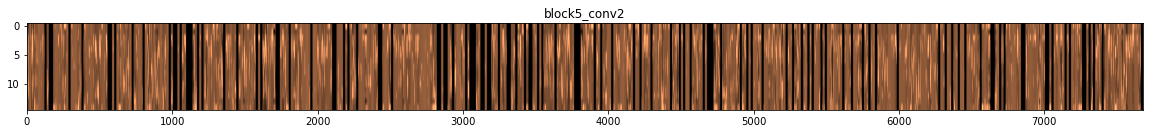

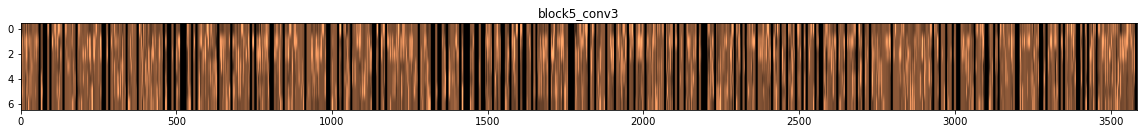

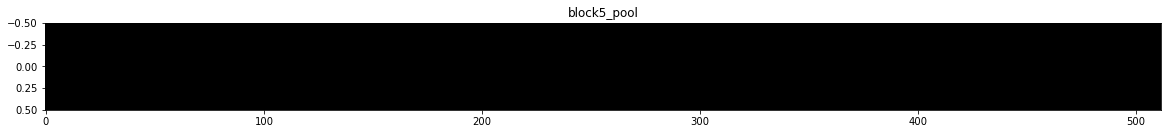

In [44]:
img_path='Test Samples/Images/Y256.jpg' 
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


img = tf.keras.preprocessing.image.load_img(img_path, target_size=(244, 244))  # this is a PIL image

x   = tf.keras.preprocessing.image.img_to_array(img) # Numpy array with shape (224, 224, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 224, 224, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
# Color Mapping (https://en.wikipedia.org/wiki/Color_mapping)
    
# Color mapping is a function that maps (transforms) the colors of one (source) image to the colors of another (target) image.
# A color mapping may be referred to as the algorithm that results in the mapping function or the algorithm that 
# transforms the image colors.  Color mapping is also sometimes called color transfer

# Applications 

# Color mapping can serve two different purposes: 
# one is calibrating the colors of two cameras for further processing using two or more sample images
# the second is adjusting the colors of two images for perceptual visual compatibility.

# Color calibration is an important pre-processing task in computer vision applications.
# Many applications simultaneously process two or more images and, therefore, need their colors to be calibrated.
# Examples of such applications are: Image differencing, registration, object recognition, multi-camera tracking, 
# co-segmentation and stereo reconstruction.

# ColorMaps applied 
# copper: sequential increasing shades of black-copper
# bone:  sequential increasing black-white color map with a tinge of blue, to emulate X-ray film
# hot: equential black-red-yellow-white, to emulate blackbody radiation from an object at increasing temperatures  
# gray: sequential linearly-increasing black-to-white grayscale

    scale = 20. / n_features
    #plt.figure( figsize=(scale * n_features, scale) )
    plt.figure(figsize=(20, 1.6)) # (20, 1.6)
    plt.title(layer_name)
    plt.grid(False )
    plt.imshow(display_grid, aspect='auto', cmap='copper') # Use: copper, hot, bone 